In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

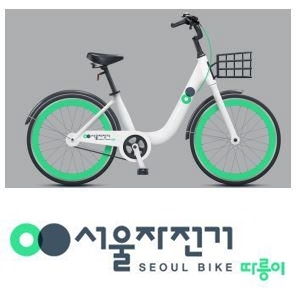

### 비즈니스 이해 단계
##### 이 분야의 사람들은(업자) 무엇을 궁금해할까?
* 어떤 사람들이 언제 이용하는지
* 지난 몇 년간 이용객 변화 추세
* 코로나 이전 / 이후 어떤 변화가 있나?
* 사람들의 이용에 어떤 요인이 영향을 크게 미치나?
* 자전거 대여소 위치별 이용량 차이를 이용한 효율적 관리인원 분배.

In [2]:
# 파일 경로를 다루기 용이하게 도와주는 도구 : glob
from glob import glob
path_list = glob('*.csv') + glob('*.xlsx')
len(path_list)

40

In [3]:
pd.read_csv(path_list[0], encoding='cp949')
# 읽어들일 때 한글이 깨져있거나 읽어들이지 못 하는 경우에 사용
# latin, cp949, iso-8859-1, euc-kr, utf-8, utf-8-sig 정도

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,0,504,504. 신자초교입구교차로,정기권,NaN,~10대,3,74.84,0.67,2880.0,17
1,2019-12-01,0,1029,1029. 롯데 시네마,정기권,NaN,~10대,1,246.71,2.06,8900.0,45
2,2019-12-01,0,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,NaN,~10대,1,25.60,0.23,1010.0,12
3,2019-12-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,NaN,~10대,1,78.59,0.73,3150.0,17
4,2019-12-01,0,1528,1528. 삼각산동 주민센터,정기권,NaN,~10대,1,26.15,0.22,930.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6894861,2020-05-31,23,1610,1610. 화랑대역 2번출구 앞,일일권,M,30대,1,231.20,1.65,7120.0,34
6894862,2020-05-31,23,2318,2318. 삼성중앙역4번출구(문화센터더 리빌),일일권,M,30대,1,175.53,1.37,5910.0,40
6894863,2020-05-31,23,2329,2329. 르네상스호텔사거리 역삼지하보도 2번출구,일일권,M,30대,1,0.00,0.00,0.0,20
6894864,2020-05-31,23,1450,1450. 화랑대역 7번출구,일일권,M,40대,1,0.00,0.00,0.0,5


In [6]:
pd.read_excel(path_list[-1])

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-11-01,0,1361,홍익중고 입구,정기권,F,~10대,1,44.02,0.40,1710,9
1,2018-11-01,0,1403,중화빌딩 앞 (동부시장),정기권,F,~10대,2,21.73,0.22,930,7
2,2018-11-01,0,729,서부식자재마트 건너편,정기권,F,20대,1,36.59,0.36,1540,10
3,2018-11-01,0,747,목동3단지 상가,정기권,F,20대,1,12.47,0.15,630,4
4,2018-11-01,0,505,자양사거리 광진아크로텔 앞,정기권,F,20대,1,22.05,0.27,1160,7
...,...,...,...,...,...,...,...,...,...,...,...,...
465710,2018-11-30,23,2239,교대역 6번출구,일일권,M,30대,1,425.78,2.08,8960,61
465711,2018-11-30,23,1210,롯데월드타워(잠실역2번출구 쪽),일일권,M,30대,1,32.15,0.23,990,5
465712,2018-11-30,23,1162,공항초등학교건너편,일일권,M,40대,1,40.73,0.28,1210,7
465713,2018-11-30,23,1288,문정중교 사거리,일일권,M,60대,1,18.30,0.18,770,3


In [7]:
import time
t0 = time.time()
pd.read_csv(path_list[0], encoding='cp949') # csv 파일 열 때
t1 = time.time()
pd.read_excel(path_list[-1]) # excel 파일 열 때
t2 = time.time()

csv_rows = 6894866
excel_rows = 465715
csv_time= t1 - t0
excel_time= t2 - t1
csv_row_per_sec = csv_rows // csv_time
excel_per_sec = excel_rows // excel_time
print(csv_row_per_sec, excel_per_sec)
# csv 파일과 excel 파일의 초당 read 하는 row 개수 차이가 크다.
# excel 파일이라면 csv 로 변환해야 다음 단계가 빨라집니다.

545365.0 7319.0


In [9]:
all_cols = []
for path in path_list:
    if '.csv' in path:
        col = list(pd.read_csv(path, encoding='cp949').columns)
    else:
        col = list(pd.read_excel(path).columns)
    all_cols = all_cols + col
print(len(all_cols))

# 만약 모든 파일들의 컬럼이 같다면, all_cols 안의 것들을 중복제거시
# 총 12개가 남아있어야 합니다.

480


In [10]:
reset_col = all_cols[:12]
interested = ['대여일자', '대여시간', 
              '대여구분코드', '성별', '연령대코드']
all_df = pd.DataFrame() # 모든 데이터를 담을 빈 데이터 프레임 만들기
for path in path_list:
    if '.csv' in path:
        single = pd.read_csv(path, encoding='cp949')
    else:
        single = pd.read_excel(path)
    single.columns = reset_col # 컬럼 이름 재정의(바꾸기)
    all_df = pd.concat([all_df, single[interested]])
    # 관심 있는 interested 컬럼만 선별하여 all_df에 row 추가
    print(all_df.shape)
    del single

(6894866, 5)
(9021414, 5)
(11075414, 5)
(12521408, 5)
(14723496, 5)
(17056262, 5)
(18736090, 5)
(19802991, 5)
(20521848, 5)
(21521848, 5)
(22521848, 5)
(23521848, 5)
(23950374, 5)
(24378900, 5)
(25347951, 5)
(26130509, 5)
(26577890, 5)
(27281343, 5)
(27975936, 5)
(28575132, 5)
(29575132, 5)
(30095782, 5)
(31095782, 5)
(32095782, 5)
(33095782, 5)
(34095782, 5)
(35095782, 5)
(36095782, 5)
(37095782, 5)
(38095782, 5)
(39121045, 5)
(39422884, 5)
(40327705, 5)
(41034793, 5)
(41931680, 5)
(42666140, 5)
(43318027, 5)
(43991639, 5)
(44642314, 5)
(45108029, 5)


In [11]:
all_df.to_csv("processed_17_21.csv",index=False)

In [12]:
del all_df

In [14]:
df = pd.read_csv("processed_17_21.csv")
print(df.shape)
df.head()

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(45108029, 5)


,대여일자,대여시간,대여구분코드,성별,연령대코드
0,2019-12-01,0,정기권,NaN,~10대
1,2019-12-01,0,정기권,NaN,~10대
2,2019-12-01,0,정기권,NaN,~10대
3,2019-12-01,0,정기권,NaN,~10대
4,2019-12-01,0,정기권,NaN,~10대


In [15]:
set(df['연령대코드'])
#컬럼안에, 같은 의미인데, 다르게 표기된 경우가 있다.
#지금 식별된 것은, 따옴표입니다.
#따라서, 모든 컬럼에 대하여 따옴표를 지울 것입니다.

{"'20대'",
 "'30대'",
 "'40대'",
 "'50대'",
 "'60대'",
 "'70대~'",
 "'~10대'",
 '20대',
 '30대',
 '40대',
 '50대',
 '60대',
 '70대~',
 nan,
 '~10대'}

In [16]:
sample_str = "'단체'"
print(sample_str)
print(sample_str.replace('\'',''))

'단체'
단체


In [18]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: str(x).replace('\'',''))
    # \' 는 따옴표를 문자열 만드는 기능으로서가 아닌
    #따옴표 글자 하나로서 인식시키기 위함
set(df['연령대코드'])

{'20대', '30대', '40대', '50대', '60대', '70대~', 'nan', '~10대'}

In [19]:
set(df['성별'])
#성별 컬럼에 들어있는 값들이 일관성이 없어서 이를 처리.

{'', 'F', 'M', '\\N', 'f', 'm', 'nan'}

In [20]:
mapper={'':'U',
 'F':'F',
 'M':'M',
 '\\N':'F',
 'f':'F',
 'm':'M',
 'nan':'U'}
df['gender']= df['성별'].apply(lambda x : mapper[str(x)])
set(df['gender'])


{'F', 'M', 'U'}

In [21]:
set(df['대여구분코드'])

{'단기권(전기)',
 '단체',
 '단체권',
 '일일(2시간권)',
 '일일(비회원)',
 '일일(회원)',
 '일일권',
 '일일권(비회원)',
 '정기',
 '정기(2시간권)',
 '정기권'}

In [22]:
mapper = {'단기권(전기)':'casual',
 '단체':'group',
 '단체권':'group',
 '일일(2시간권)':'casual',
 '일일(비회원)':'casual',
 '일일(회원)':'casual',
 '일일권':'casual',
 '일일권(비회원)':'casual',
 '정기':'regular',
 '정기(2시간권)':'regular',
 '정기권':'regular'}
df['type'] = df['대여구분코드'].map(mapper) # map함수: 딕셔너리를 이용하여 value값으로 매핑시켜준다.
df.head()

,대여일자,대여시간,대여구분코드,성별,연령대코드,gender,type
0,2019-12-01,0,정기권,nan,~10대,U,regular
1,2019-12-01,0,정기권,nan,~10대,U,regular
2,2019-12-01,0,정기권,nan,~10대,U,regular
3,2019-12-01,0,정기권,nan,~10대,U,regular
4,2019-12-01,0,정기권,nan,~10대,U,regular


In [ ]:
"2019-12-01 00:00:00"
# 대여일자와 대여시간 두개의 컬럼을 이용하여
# 위와 같은 문자열을 만들고자 함.
df['대여일자']+ df['대여시간']

In [26]:
sample_date = '2019-12-01'
sample_hour = '19'
datetime = sample_date + ' ' + str('0' + sample_hour)[-2:] + ':00:00' #0을 붙이고 뒤에서부터 2개 읽기
datetime

'2019-12-01 19:00:00'

In [27]:
df.sort_values(by= '대여일자')

,대여일자,대여시간,대여구분코드,성별,연령대코드,gender,type
24380854,2017-01-01,21,정기,M,40대,M,regular
24380352,2017-01-01,17,일일(회원),F,20대,F,casual
24380351,2017-01-01,17,일일(회원),F,20대,F,casual
24380350,2017-01-01,17,일일(회원),F,20대,F,casual
24380349,2017-01-01,17,일일(회원),F,20대,F,casual
...,...,...,...,...,...,...,...
20499348,2021-01-31,14,정기권,nan,20대,U,regular
20499347,2021-01-31,14,정기권,nan,20대,U,regular
20499346,2021-01-31,14,정기권,nan,20대,U,regular
20499344,2021-01-31,14,정기권,nan,20대,U,regular


In [28]:
set(df['대여일자'].apply(lambda x : len(x)))

{10, 19}

In [29]:
df['대여일자_길이'] = df['대여일자'].apply(lambda x : len(x))
df.loc[df['대여일자_길이'] == 19]

,대여일자,대여시간,대여구분코드,성별,연령대코드,gender,type,대여일자_길이
39121045,2018-01-01 00:00:00,0,정기권,F,~10대,F,regular,19
39121046,2018-01-01 00:00:00,0,정기권,F,20대,F,regular,19
39121047,2018-01-01 00:00:00,0,정기권,F,20대,F,regular,19
39121048,2018-01-01 00:00:00,0,정기권,F,20대,F,regular,19
39121049,2018-01-01 00:00:00,0,정기권,F,20대,F,regular,19
...,...,...,...,...,...,...,...,...
45108024,2018-11-30 00:00:00,23,일일권,M,30대,M,casual,19
45108025,2018-11-30 00:00:00,23,일일권,M,30대,M,casual,19
45108026,2018-11-30 00:00:00,23,일일권,M,40대,M,casual,19
45108027,2018-11-30 00:00:00,23,일일권,M,60대,M,casual,19


In [30]:
d_sample = '2018-01-01 00:00:00'
d_sample.split(' ')[0]

'2018-01-01'

In [33]:
df['datetime'] = df['대여일자'].apply(
lambda x : x.split(' ')[0]) + ' ' + df['대여시간'].apply(lambda x : str('0' + str(x))[-2:]) + ":00:00"
# 대여일자 컬럼에 년-월-일 이 아닌 다른 정보가 같이
# 들어있는 경우가 있기 때문에 .split(' ')[0] 이용하여 년-월-일만 선택
# 이후, 시간 컬럼과 조합하여 
# 년-월-일 시:분:초 형태로 datetime 컬럼 생성

In [34]:
df.head()

,대여일자,대여시간,대여구분코드,성별,연령대코드,gender,type,대여일자_길이,datetime
0,2019-12-01,0,정기권,nan,~10대,U,regular,10,2019-12-01 00:00:00
1,2019-12-01,0,정기권,nan,~10대,U,regular,10,2019-12-01 00:00:00
2,2019-12-01,0,정기권,nan,~10대,U,regular,10,2019-12-01 00:00:00
3,2019-12-01,0,정기권,nan,~10대,U,regular,10,2019-12-01 00:00:00
4,2019-12-01,0,정기권,nan,~10대,U,regular,10,2019-12-01 00:00:00


In [35]:
set(df['연령대코드'])

{'20대', '30대', '40대', '50대', '60대', '70대~', 'nan', '~10대'}

In [36]:
mapper = {'20대':'20s',
 '30대':'30s',
 '40대':'40s',
 '50대':'50s',
 '60대':'60s',
 '70대~':'70s',
 'nan':'unknown',
 '~10대':'10s'}
df['age'] = df['연령대코드'].apply(lambda x : mapper[str(x)])
df.head()

,대여일자,대여시간,대여구분코드,성별,연령대코드,gender,type,대여일자_길이,datetime,age
0,2019-12-01,0,정기권,nan,~10대,U,regular,10,2019-12-01 00:00:00,10s
1,2019-12-01,0,정기권,nan,~10대,U,regular,10,2019-12-01 00:00:00,10s
2,2019-12-01,0,정기권,nan,~10대,U,regular,10,2019-12-01 00:00:00,10s
3,2019-12-01,0,정기권,nan,~10대,U,regular,10,2019-12-01 00:00:00,10s
4,2019-12-01,0,정기권,nan,~10대,U,regular,10,2019-12-01 00:00:00,10s


In [37]:
df.columns

Index(['대여일자', '대여시간', '대여구분코드', '성별', '연령대코드', 'gender', 'type', '대여일자_길이',
       'datetime', 'age'],
      dtype='object')

In [38]:
interested = ['datetime','age','gender','type']
df[interested].to_csv('clean_data.csv',index = False)

In [39]:
del df

In [40]:
df = pd.read_csv('clean_data.csv')

In [41]:
df.head()

,datetime,age,gender,type
0,2019-12-01 00:00:00,10s,U,regular
1,2019-12-01 00:00:00,10s,U,regular
2,2019-12-01 00:00:00,10s,U,regular
3,2019-12-01 00:00:00,10s,U,regular
4,2019-12-01 00:00:00,10s,U,regular


In [42]:
import numpy as np
df['count'] = 1
reg = df.loc[df['type'] =='regular']
reg.groupby('datetime').agg({'count' : np.sum})

,count
datetime,
2017-01-01 00:00:00,63
2017-01-01 01:00:00,55
2017-01-01 02:00:00,38
2017-01-01 03:00:00,22
2017-01-01 04:00:00,16
...,...
2021-01-31 19:00:00,1346
2021-01-31 20:00:00,1298
2021-01-31 21:00:00,1229


In [43]:
reg = df.loc[df['type'] == 'regular']
reg = reg.groupby('datetime').agg({'count' : np.sum}).reset_index()
reg.columns = ['datetime', 'regular']

cas = df.loc[df['type'] == 'casual']
cas = cas.groupby('datetime').agg({'count' : np.sum}).reset_index()
cas.columns = ['datetime', 'casual']

gro = df.loc[df['type'] == 'group']
gro = gro.groupby('datetime').agg({'count' : np.sum}).reset_index()
gro.columns = ['datetime', 'group']

In [49]:
rc = pd.merge(reg,cas,how= 'outer') #inner 교집합 outer 합집합
rcg = pd.merge(rc,gro,how = 'outer')
rcg = rcg.fillna(0) # na(빈 킨)을 채운다고하여 fillna이다.
rcg.head()

,datetime,regular,casual,group
0,2017-01-01 00:00:00,63.0,13.0,1.0
1,2017-01-01 01:00:00,55.0,21.0,0.0
2,2017-01-01 02:00:00,38.0,19.0,0.0
3,2017-01-01 03:00:00,22.0,12.0,0.0
4,2017-01-01 04:00:00,16.0,7.0,0.0


In [51]:
rcg.to_csv('by_time_merge.csv',index = False)

In [ ]:
### 판다스로 크롤링하기 -> 날씨 정보 가져오기

In [ ]:
date = '2020-01-01'
url = 'https://freemeteo.co.uk/weather/seoul/history/daily-history/?gid=1835848&station=10565&date='
end = '&language=english&country=south-korea'
one_page_dfs = pd.read_html(url + date + end)[6]
one_page_dfs['date'] = date
one_page_dfs.to_csv(date+'.csv', index=False)
# 한 페이지에 있는 모든 데이터 프레임을 가져옵니다.
# 가져와서 6번째 인덱스에 들어있는 시간대별 날씨 정보를 one_page_dfs 에 놓습니다.

In [ ]:
def save_weather(date):
    url = 'https://freemeteo.co.uk/weather/seoul/history/daily-history/?gid=1835848&station=10565&date='
    end = '&language=english&country=south-korea'
    one_page_dfs = pd.read_html(url + date + end)[6]
    one_page_dfs['date'] = date
    one_page_dfs.to_csv(date+'.csv', index=False)
save_weather('2020-01-01')

In [ ]:
import time
for date in pd.date_range('2017-01-01', '2020-01-31'):
    print(str(date)[:10])
    time.sleep(2)